<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt 

real_estate_data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') 
display(real_estate_data.head(5)) 
real_estate_data.info()
#данные склеились, попробуем их отлепить с помощью sep=

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Мы открыли файл, изучили данные, столкнулись с проблемой склеивания данных в строку и решили ее с помощью sep=. Также обнаружены пропуски в данных, пострараемся их решить.

## Предобработка данных

In [2]:
#дату публикации обрежем до дней
real_estate_data['first_day_exposition'] = pd.to_datetime(real_estate_data['first_day_exposition'], format='%Y-%m-%d').dt.date
#display(real_estate_data.head(5)) 
    
#заменим пропуски  медианой с учетом группировки по этажности 
real_estate_data['ceiling_height'] = real_estate_data['ceiling_height'].fillna(real_estate_data.groupby('floors_total')['ceiling_height'].transform('median'))
#real_estate_data.info() #пропуски остались только там где не указано количество этажей

#пропуски в living_area заменим медианой с учетом группировки по количеству комнат 
real_estate_data['living_area'] = real_estate_data['living_area'].fillna(real_estate_data.groupby('rooms')['living_area'].transform('median'))        
#real_estate_data.info()

#пропуски в is_apartment. Предположим, что в жилье, не являяющемся апартаментами, вместо False стоит пропуск и заменим пропуск на 0.
real_estate_data['is_apartment'] = real_estate_data['is_apartment'].fillna(value=False)
#real_estate_data.info()

#пропуски в balcony. Предположим, что пропуски та, где нет балкона и заполним по аналогии с is_apartment 0
real_estate_data['balcony'] = real_estate_data['balcony'].fillna(value=0)    
#real_estate_data.info()    
    
#пропуски в kitchen_area заменим медианой с учетом группировки по количеству комнат
real_estate_data['kitchen_area'] = real_estate_data['kitchen_area'].fillna(real_estate_data.groupby('rooms')['kitchen_area'].transform('median'))        
#real_estate_data.info()
        
#пропуски в airports_nearest заменим медианой с учетом группировки по locality_name
real_estate_data['airports_nearest'] = real_estate_data['airports_nearest'].fillna(real_estate_data.groupby('locality_name')['airports_nearest'].transform('median'))        
#real_estate_data.info() #всё равно много пропусков, возможно из-за того, что поселения находятся далеко от аэропортов.  

In [3]:
#пропуски в ceiling_height. 

print(real_estate_data['ceiling_height'].describe())  #посмотрим общие характеристики

real_estate_data.loc[(real_estate_data['ceiling_height'] < 2.55) | (real_estate_data['ceiling_height'] > 2.75), 'ceiling_height'] = 2.65
#print(real_estate_data['ceiling_height'].describe()) 
#с помощью loc мы избавились от аномалий, заменив медианой значения меньше 1 квартиля и больше 2 квартиля
#затем убедились, что аномалии исчезли

In [4]:
#пропуски в floors_total оставим без изменеий, нет подходящих значений для замены

#locality_name оставим без изменеий, нет подходящих значений для замены, пропусков мало, возможно просто забыли указать.

#days_exposition оставим как есть, нет данных

#cityCenters_nearest, parks_nearest, ponds_nearest parks_around3000, ponds_around3000, parks_around3000 оставим как есть. 
#Возможно объекты находятся на отдалении от центра или больших городов

In [5]:
 #перевод данных к нужному типу
real_estate_data['last_price'] = real_estate_data['last_price'].astype('int') #когда речь о миллионах, запятая не нужна

#попробуем объединить несколько столбцов для наглядности
real_estate_data[['floors_total', 'airports_nearest', 'cityCenters_nearest']] = real_estate_data[
    ['floors_total', 'airports_nearest', 'cityCenters_nearest']].round().astype('Int64')

real_estate_data['parks_nearest'] = real_estate_data['parks_nearest'].round().astype('Int64')
real_estate_data['ponds_nearest'] = real_estate_data['ponds_nearest'].round().astype('Int64')
real_estate_data['days_exposition'] = real_estate_data['days_exposition'].round().astype('Int64')

real_estate_data['balcony'] = real_estate_data['balcony'].replace('.', '').round().astype('Int64')  #здесь и далее используем 
#replace чтобы избавиться от точки, а round() чтоб избавиться от NaN
real_estate_data['parks_around3000'] = real_estate_data['parks_around3000'].replace('.', '').round().astype('Int64')
real_estate_data['ponds_around3000'] = real_estate_data['ponds_around3000'].replace('.', '').round().astype('Int64')
#для total_area, ceiling_height, living_area, kitchen_area перевод не нужен, тут цифры после запятой выжны

real_estate_data.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23621 non-null float64
floors_total            23613 non-null Int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23502 non-null float64
balcony                 23699 non-null Int64
locality_name           23650 non-null object
airports_nearest        18305 non-null Int64
cityCenters_nearest     18180 non-null Int64
parks_around3000        18181 non-null Int64
parks_nearest           8079 non-null Int64
ponds_around3000        18181 

## Расчёты и добавление результатов в таблицу

In [6]:
#цена за метр2 = цена / площадь 
real_estate_data['price_of_m2'] = real_estate_data['last_price'] / real_estate_data['total_area']
#приведем к типу int, чтоб в дальнейшем производить вычисления было удобно
real_estate_data['price_of_m2'] = real_estate_data['price_of_m2'].round().astype('Int64')
#добавим столбws с днем недели, месяцем и годом
real_estate_data['weekday'] = pd.to_datetime(real_estate_data['first_day_exposition'], format='%Y-%m-%d').dt.weekday
real_estate_data['month'] = pd.to_datetime(real_estate_data['first_day_exposition'], format='%Y-%m-%d').dt.month
real_estate_data['year'] = pd.to_datetime(real_estate_data['first_day_exposition'], format='%Y-%m-%d').dt.year
#добавим столбец про этаж
def floor_type(row):   #создадим функцию
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой' 
real_estate_data['floor_type'] = real_estate_data.apply(floor_type, axis=1)
#соотношение жилой к общей
real_estate_data['living_to_total'] = real_estate_data['living_area'] / real_estate_data['total_area']
#соотношение кухни к общей
real_estate_data['kitchen_to_total'] = real_estate_data['kitchen_area'] / real_estate_data['total_area']
display(real_estate_data.head(3))



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_of_m2,weekday,month,year,floor_type,living_to_total,kitchen_to_total
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755,NaN,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,0,NaN,81,82921,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,2,574,558,92786,3,8,2015,другой,0.612500,0.148214


## Исследовательский анализ данных

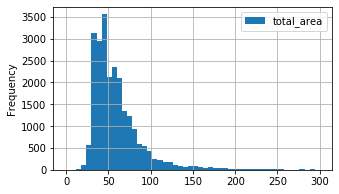

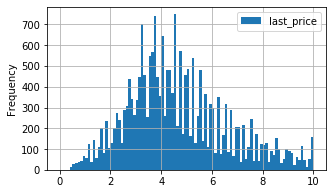

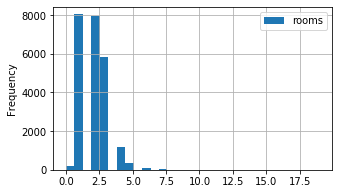

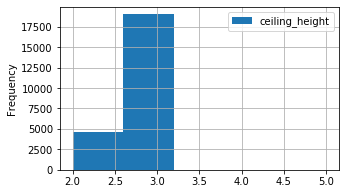

In [21]:
#гистограмма площади
#print(real_estate_data['total_area'].describe())
real_estate_data.plot(y = 'total_area', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range = (0,300)) 
#распределение данных нормальное

#гистограмма цены
#print(real_estate_data['last_price'].describe())
real_estate_data['last_price'] = real_estate_data['last_price'] / 1000000
real_estate_data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,10), figsize = (5,3))
#распределение данных нормальное

#число комнат
#print(real_estate_data['rooms'].describe())
real_estate_data.loc[real_estate_data.studio == True, 'rooms'] = 0 #приравняем количество комнат в студии к 0
real_estate_data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
#похоже на правду

#высота потолков
real_estate_data.plot(y = 'ceiling_height', kind = 'hist', bins = 5, range = (2,5), grid=True, figsize = (5,3))
#похоже на правду


count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64
count    18896.000000
mean       191.640188
std        225.707795
min          1.000000
25%         41.000000
50%        110.000000
75%        252.000000
max       1580.000000
Name: days_exposition, dtype: float64


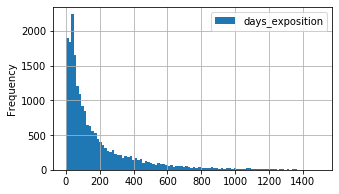

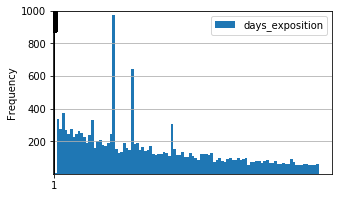

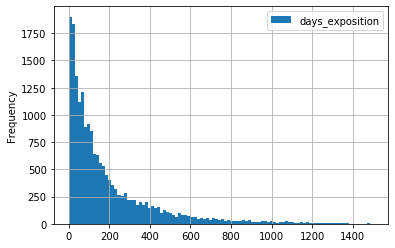

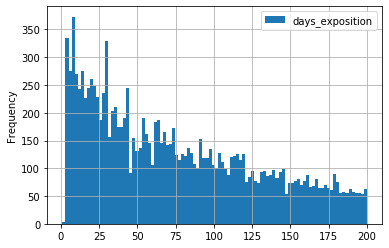

In [22]:
#время продажи
print(real_estate_data['days_exposition'].describe())

#обычно продажа занимает примерно 95 дней, за норму возьмем интервал от 45 до 232 дней.
real_estate_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, range = (1,1500), figsize = (5,3))
real_estate_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, range = (1,200), figsize = (5,3)) 
#обнаружили аномальные данные в районе 45, 60 и 90 дней
#возможно это связано с правилами сайта о сроке хранения объявления
#print(real_estate_data[real_estate_data['days_exposition']==45])
# сделаем новую таблицу без учета аномалий
real_estate_data_norm = real_estate_data.query('days_exposition != 45 and days_exposition != 60 and days_exposition != 90')

#проверяем данные после удаления аномалий
plt.boxplot(real_estate_data_norm['days_exposition'])
plt.ylim(1,1000)
real_estate_data_norm.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,1500))
real_estate_data_norm.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))
print(real_estate_data_norm['days_exposition'].describe())
#гистограмма стала ровнее,квартили поменялись, тем самым диапазон нормальных значений увеличился.

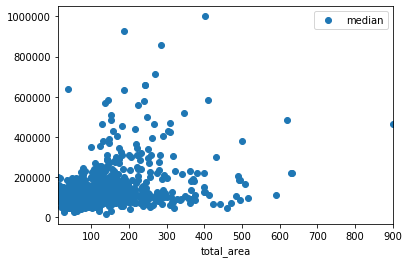

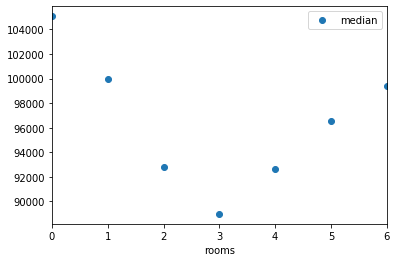

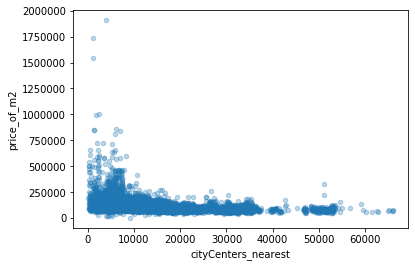

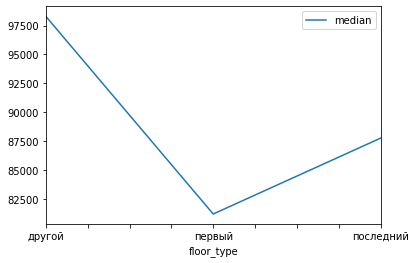

In [23]:
#факторы, влияющие на стоимость квартир
#1 цена-площадь
pivot_table_total_area = real_estate_data.pivot_table(
    index = 'total_area', values = 'price_of_m2', aggfunc = ['mean', 'count', 'median']
)
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')
pivot_table_total_area.sort_values('median', ascending = False)
#print(real_estate_data['total_area'].corr(real_estate_data['price_of_m2']))
#кореляция есть в сторону увеличения площади, но слабая. 0.3

#2 цена-колличество комнат
pivot_table_rooms = real_estate_data.pivot_table(
    index = 'rooms', values = 'price_of_m2', aggfunc = ['mean', 'count', 'median']
)
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 100').plot(y = 'median', style = 'o')
pivot_table_rooms.query('count > 100').sort_values('median', ascending = False)
#print(real_estate_data['rooms'].corr(real_estate_data['price_of_m2']))
#цена за квадрат падает от студии до трехкомнатной, это объясняется тем, что студии и однушки самые популярные для покупки

#3 цена-удаленность от центра
#pivot_table_сenter = real_estate_data.pivot_table(
#index = 'cityCenters_nearest', values = 'price_of_m2', aggfunc = ['mean', 'count', 'median']
#)
#pivot_table_сenter.columns = ['mean', 'count', 'median']
#pivot_table_сenter.plot(y = 'median', style = 'o')
#pivot_table_сenter.sort_values('median', ascending = False)

real_estate_data.plot(kind = 'scatter', y = 'price_of_m2', x = 'cityCenters_nearest', alpha = 0.3)
#чем ближе к центру тем стоимость выше, связь четко прослеживается

#4 цена-этаж
pivot_table_floor_type = real_estate_data.pivot_table(
    index = 'floor_type', values = 'price_of_m2', aggfunc = ['mean', 'count', 'median']
)
pivot_table_floor_type.columns = ['mean', 'count', 'median']
pivot_table_floor_type.plot(y = 'median')
#первый этаж самый дешевый, затем идет последний этаж. Другие этажи гораздо дороже.

In [47]:
#5 цена от даты размещения
#попробуем построить графики в цикле

#columns = ['weekday', 'month', 'year']
#for i in columns:
    #pivot_table_date = real_estate_data.pivot_table(
    #index = 'i', values = 'price_of_m2', aggfunc = ['mean', 'count', 'median']
    #pivot_table_date.columns = ['mean', 'count', 'median']
    #pivot_table_date.plot(y = 'median')
    #pivot_table_date.sort_values('median', ascending = False)
                    

In [7]:
plot_columns = [
    'total_area',
    'rooms',
    'ceiling_height'
]

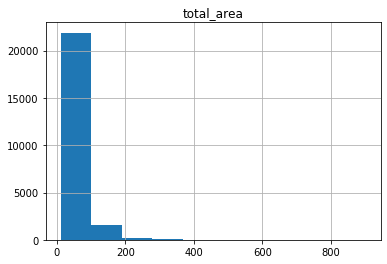

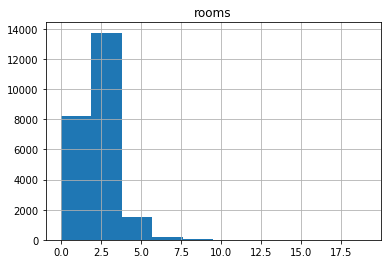

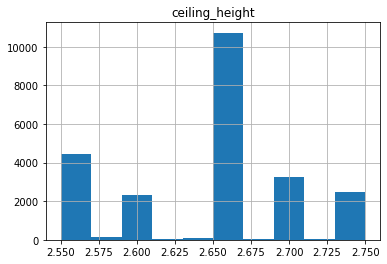

In [11]:
for col in plot_columns:
    real_estate_data[col].hist()
    plt.title(col)
    plt.show()

,mean,count,median
year,,,
2014,124830.459854,137,107000
2019,107123.773532,2879,103306
2018,97773.557460,8519,95690
2015,104614.206549,1191,93415
2017,97621.874847,8190,92565
2016,98322.341358,2783,91743


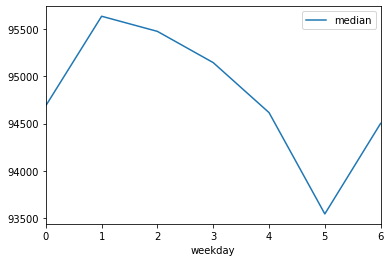

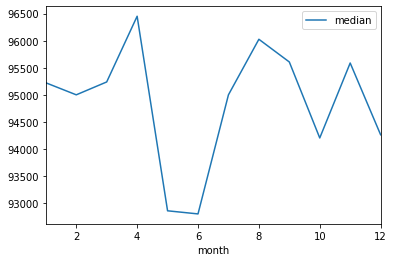

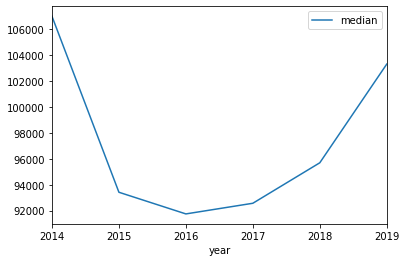

In [28]:
#5 цена от даты размещения
#5.1 день недели        
pivot_table_weekday = real_estate_data.pivot_table(
    index = 'weekday', values = 'price_of_m2', aggfunc = ['mean', 'count', 'median']
)    
pivot_table_weekday.columns = ['mean', 'count', 'median']
pivot_table_weekday.plot(y = 'median')
pivot_table_weekday.sort_values('median', ascending = False)
#цена растет и достигает пика во вторник и минимума к субботе...в принципе это с вязано с обычной рабочей продуктивностью 
#человека)
#5.2 месяц
pivot_table_month = real_estate_data.pivot_table(
    index = 'month', values = 'price_of_m2', aggfunc = ['mean', 'count', 'median']
)
pivot_table_month.columns = ['mean', 'count', 'median']
pivot_table_month.plot(y = 'median')
pivot_table_month.sort_values('median', ascending = False)
#цена с начала года растет и достигает первого пика в апреле, затем резкое падение май и июнь. Сезон отпусков никто не отменял
#Второй и третьи пики приходятся на август и ноябрь
#год
pivot_table_year = real_estate_data.pivot_table(
    index = 'year', values = 'price_of_m2', aggfunc = ['mean', 'count', 'median']
)
pivot_table_year.columns = ['mean', 'count', 'median']
pivot_table_year.plot(y = 'median')
pivot_table_year.sort_values('median', ascending = False)
#цены достигли дна и были на низких уровнях с 2015 по 2017 года (кризис!). затем пошел подъем до прежних высоких уровней

In [29]:
#населенные пункты
pivot_table_locality = real_estate_data.pivot_table(
    index = 'locality_name', values = 'price_of_m2', aggfunc=['count', 'mean']
)
pivot_table_locality.columns = ['count', 'mean']
pivot_table_locality = pivot_table_locality.sort_values('count', ascending = False).head(10)
pivot_table_locality
#самая высокая стоимость
pivot_table_locality[pivot_table_locality['mean']==pivot_table_locality['mean'].max()] #как и ожидалось -  Санкт-Петербург
#самая низкая стоимость
pivot_table_locality[pivot_table_locality['mean']==pivot_table_locality['mean'].min()] #самый дешевый -  Выборг, 
#думаю это связано с большой удаленностью от Санкт-Петербурга

,count,mean
locality_name,,
Выборг,237,58141.919831


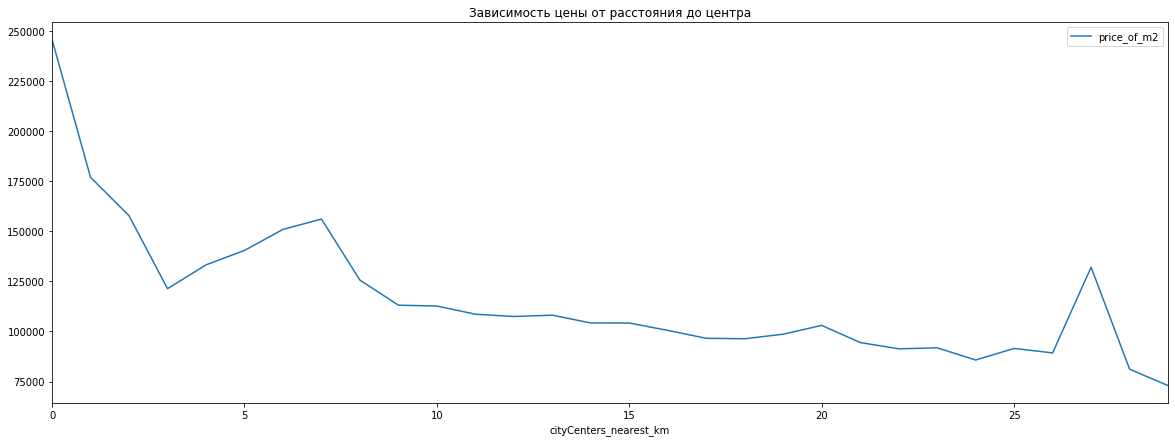

,mean,count,median
year,,,
2014,289487.000000,7,278100.0
2019,184901.606061,99,133333.0
2018,148071.672065,247,123529.0
2017,142408.000000,322,116654.5
2015,156105.833333,90,107981.0
2016,133605.780702,114,107142.5


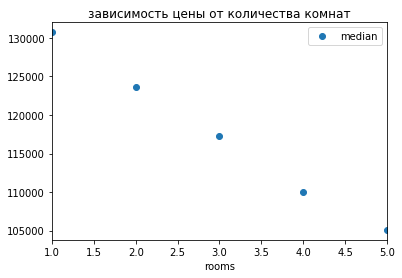

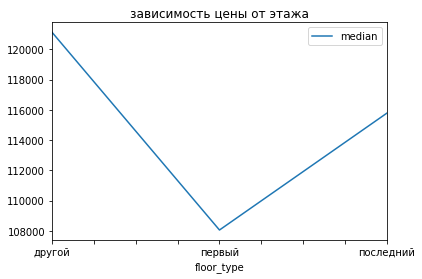

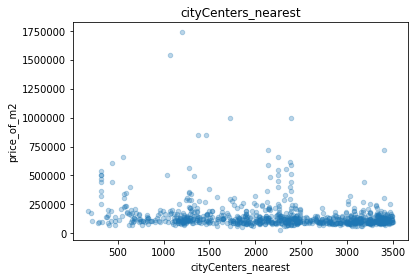

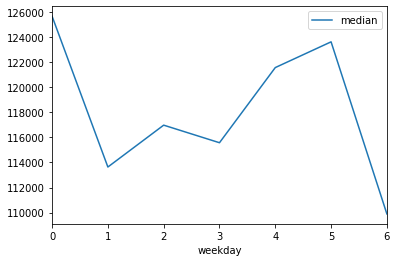

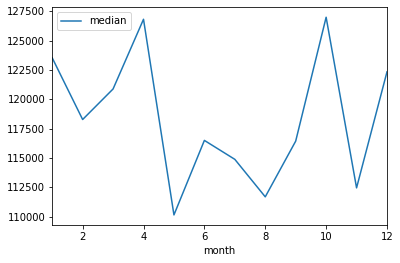

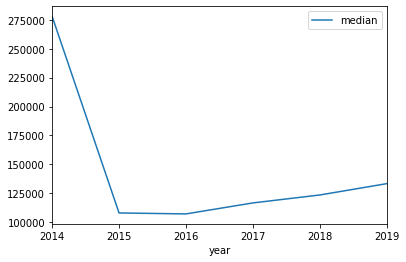

In [30]:
#находим центральную область
real_estate_data['cityCenters_nearest_km'] = real_estate_data['cityCenters_nearest'] / 1000
#real_estate_data['cityCenters_nearest_km'] = real_estate_data['cityCenters_nearest_km'].fillna(999999)
real_estate_data['cityCenters_nearest_km'] = real_estate_data['cityCenters_nearest_km'].round().astype('Int64')
pivot_table_km = real_estate_data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'cityCenters_nearest_km', values = 'price_of_m2', aggfunc = 'mean')
pivot_table_km.plot(title='Зависимость цены от расстояния до центра', figsize=(20,7)) 
plt.show()
pivot_table_km 
# в районе 3 км от центра происходит перелом цены, будем считать центром территорию радиусом в 3 км.

#выделим центр и проанализируем
real_estate_data_center = real_estate_data.query('cityCenters_nearest_km <= 3 and locality_name == "Санкт-Петербург"')
#real_estate_data_center.head(10)
#число комнат
center_rooms = real_estate_data_center.pivot_table(index = 'rooms', values = 'price_of_m2', aggfunc = ['mean', 'count', 'median'])
center_rooms.columns = ['mean', 'count', 'median']
center_rooms.query('count > 50').plot(title='зависимость цены от количества комнат', y = 'median', style = 'o')
center_rooms.query('count > 50').sort_values('median', ascending = False)
# картина немного отличается,от общей. тут цена за квадрат постоянно падает с ростом количества комнат

#этаж
center_floors = real_estate_data_center.pivot_table(index = 'floor_type', values = 'price_of_m2', aggfunc = ['mean', 'count', 'median'])
center_floors.columns = ['mean', 'count', 'median']
center_floors.plot(title='зависимость цены от этажа', y = 'median')
#зависимость такая же как и в общем. первый этаж самый дешевый, затем последний. 

#удаленность от центра
real_estate_data_center.plot(title='cityCenters_nearest', kind = 'scatter', y = 'price_of_m2', x = 'cityCenters_nearest', alpha = 0.3)
#нет четкой зависимости, так как все квартиры итак в центре.

#дата размещения
#день недели
center_weekday = real_estate_data_center.pivot_table(index = 'weekday', values = 'price_of_m2', aggfunc = ['mean', 'count', 'median'])
center_weekday.columns = ['mean', 'count', 'median']
center_weekday.plot(y = 'median')
center_weekday.sort_values('median', ascending = False)
#в отличае от общей картины пик продаж понедельник и пятница, а худшие дни вторник и воскресенье
#месяц
center_month = real_estate_data_center.pivot_table(index = 'month', values = 'price_of_m2', aggfunc = ['mean', 'count', 'median'])
center_month.columns = ['mean', 'count', 'median']
center_month.plot(y = 'median')
center_month.sort_values('median', ascending = False)
#в целом картина схожая с общей, в с мая по август спад, пики - апрель и октябрь
#год
center_year = real_estate_data_center.pivot_table(index = 'year', values = 'price_of_m2', aggfunc = ['mean', 'count', 'median'])
center_year.columns = ['mean', 'count', 'median']
center_year.plot(y = 'median')
center_year.sort_values('median', ascending = False)
#мы видим такой же спад в 2015, 2016 и 2017 годах, н в отличае от общей картины тут так и не произошел возврат до прежних цен. 
#видимо цены на более дорогие квартиры растут медленнее чем на дешевые.

В районе 3 км от центра происходит перелом цены, так что будем считать центром территорию радиусом в 3 км!

## Общий вывод

С проблемами мы столкнулись с самого начала. Данные были "склеяны", но нам удалось привести их в удобный вид, заполнить пропуски где это возможно, привести к нужному типу. Добавили в таблицу новые столбцы для большей наглядности и удобства расчетов. Далее начался исследовательский анализ.Мы изучили площадь, цену, число комнат, высоту потолков.  Изучая время продажи нашли аномалии и связали их с правилами сайта по размещению объявлений, выяснили что нормальное время размещения колеблется от 41 до 252 дней. Убрали редкие и выбивающиеся значения. Выявили связь между количеством комнат и ценой за квадрат, с увеличением комнат стоимость квадрата падает, зато цена растет при уменьшении расстояния до центра. Также выяснили что первый и последний этажи стоят дешевле чем остальные. Также на стоимось квадратного метра влияет дата размещения, а именно день недели, месяц, год. Проследя за изменением цены за квадрат в зависимости от расстояния до центра, мы выделили зону радиусом 3 км. 